# Examen de Optimización

### Máster en Ciencia de Datos

- Jesús Martínez Leal

- Samuel Ortega Mediavilla

- Pablo Vicente Martínez

In [39]:
import math
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
import sympy as sp

## Ejercicio 1

---

Usamos el método de la razón aúrea para minimizar la función

$$
f(x) = 3 * x^2 - x^2
$$

Maximizar $f(x)$ es análogo a minimizar $-f(x)$.

Como solución final, cogemos el valor medio del último intervalo.

In [40]:
def golden_ratio_search(func, lower, upper, tolerance, max_iter = 100):

    golden_ratio = (math.sqrt(5) - 1) / 2

    # Cálculo de subintervalos iniciales
    a = lower
    b = upper
    x1 = a + (1 - golden_ratio) * (b - a)
    x2 = a + golden_ratio * (b - a)

    results = []
    iter = 0
    
    results.append([iter, np.round(a, 4), np.round(b, 4)])
    
    while abs(b - a) > tolerance and (iter < max_iter):
        if func(x1) < func(x2):
            b = x2 # a no se ve modificado
        else:
            a = x1 # b no se ve modificado

        x1 = a + (1 - golden_ratio) * (b - a)
        x2 = a + golden_ratio * (b - a)
        iter = iter + 1
        
        results.append([iter, np.round(a, 4), np.round(b, 4)])
    
    table = pd.DataFrame(results)
    table.columns = ['Iteration', 'a', 'b']
        
    # Punto mínimo aproximado y valor de la función en ese punto
    min_point = (a + b) / 2
    min_value = func(min_point)

    return table, min_point, min_value, iter

In [41]:
def test_function(x):
    return - 3 * x + x ** 2

lower_bound = 0
upper_bound = 5
tolerance = 1e-1

results, min_point, min_value, iter = golden_ratio_search(test_function, lower_bound, upper_bound, tolerance)
print(f"Punto en el máximo: x* = {min_point}")
print(f"Valor de la función en el máximo: f(x*) = {- min_value}")

print("\nLos resultados para todas las iteraciones son:")
results

Punto en el máximo: x* = 1.491869381244217
Valor de la función en el máximo: f(x*) = 2.2499338930386483

Los resultados para todas las iteraciones son:


,Iteration,a,b
0,0,0.0000,5.0000
1,1,0.0000,3.0902
2,2,0.0000,1.9098
3,3,0.7295,1.9098
4,4,1.1803,1.9098
5,5,1.1803,1.6312
6,6,1.3525,1.6312
7,7,1.4590,1.6312
8,8,1.4590,1.5654
9,9,1.4590,1.5248


## Ejercicio 2

In [42]:
# Búsqueda inexacta en línea para el paso:
def backtrackingline(func, gradient, xk, direction, lamb = 0.5, c1 = 10e-4, max_iter = 100): 
    
    def armijo_condition(lamb):
        x_new = xk + lamb * direction
        func_value = func(*x_new) 
        return (func_value <= func(*xk) + c1 * lamb * gradient.dot(direction))
    
    for _ in range(max_iter):
        if armijo_condition(lamb):
            break
        lamb = lamb / 2  # Reducción del paso si no se cumple la condición de Armijo

    return lamb 

# Test de convergencia de descenso lineal
def test_convergence_linear_descend(x0, x_new, func, gradient_point_new, tol1, tol2, tol3):

    conditions = (np.linalg.norm(x0 - x_new) < tol1,
                  np.linalg.norm(gradient_point_new) < tol2,
                  abs(func(*x_new) - func(*x0)) < tol3)
    
    test = any(conditions)
    condition_idx = np.where(conditions)[0]

    return test, condition_idx

# Método del gradiente
def gradient_linear_descend(f, x, x0, tol1 = 1e-2, tol2 = 1e-2, tol3 = 1e-2, max_iterations = 10):
    
    
    func = sp.lambdify(x, f, 'numpy')
    gradient = [sp.diff(f, xi) for xi in x] # expresión simbólica del gradiente
    gradient_func = sp.lambdify(x, gradient, 'numpy')
    
    gradient_point = gradient_func(*x0)
    gradient_point = np.array(gradient_point) # pasamos a numpy array para poder operar sobre él
    d0 = -gradient_point # dirección inicial
    
    iteration = 0
    results = []
    
    results.append([iteration, np.round(x0, 5)])
    
    while iteration < max_iterations:

        lamb = backtrackingline(func, gradient_point, x0, d0) # obtención del paso con Backtracking LineSearch
        
        x_new = x0 + lamb * d0 # Aquí se obtiene el x_{k + 1}
        gradient_point_new = np.array(gradient_func(*x_new))
        d_new = -gradient_point_new
        
        test, cond_idx = test_convergence_linear_descend(x0, x_new, func, gradient_point_new, tol1, tol2, tol3)
        
        if test:
            print(f"Convergencia conseguida debido a la condición: {cond_idx}")
            break
        else:
            x0 = x_new
            d0 = d_new
            gradient_point = gradient_point_new
            iteration = iteration + 1

        results.append([iteration, np.round(x0, 5)])
        
    table = pd.DataFrame(results)
    table.columns = ['Iteration', 'x']
    
    return table, x_new

In [43]:
x, y = sp.symbols('x y')
f = - (x + y) * sp.exp(-(x + y)) + x

initial_guess = [0, 1]

result, xopt = gradient_linear_descend(f, (x, y), initial_guess)

print(f"\nEl valor óptimo corresponde con el x^(k + 1) de la última iteración: x* ≈ {xopt}")

result


El valor óptimo corresponde con el x^(k + 1) de la última iteración: x* ≈ [-2.84253852  3.15746148]


,Iteration,x
0,0,"[0, 1]"
1,1,"[-0.5, 1.0]"
2,2,"[-0.84837, 1.15163]"
3,3,"[-1.09113, 1.40887]"
4,4,"[-1.34286, 1.65714]"
5,5,"[-1.59246, 1.90754]"
6,6,"[-1.84256, 2.15744]"
7,7,"[-2.09253, 2.40747]"
8,8,"[-2.34254, 2.65746]"
9,9,"[-2.59254, 2.90746]"


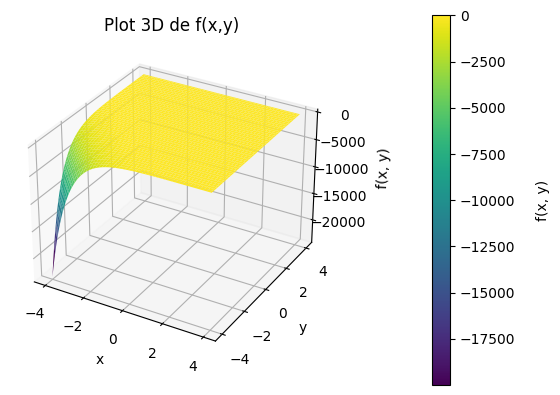

In [44]:
x, y = sp.symbols('x y')
f = (x + y) * sp.exp(-(x + y)) - x
f_numeric = sp.lambdify((x, y), f, 'numpy')

x_values = np.linspace(-4, 4, 100)
y_values = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = f_numeric(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)', labelpad=10)

cbar = fig.colorbar(surf, pad=0.2)
cbar.set_label('f(x, y)', labelpad=15)

plt.title('Plot 3D de f(x,y)')
plt.show()


Obtenemos que el método del gradiente para la función $-f(x,y)$ no converge a ningún punto. Podemos observar en la representación que esta función no presenta ningún máximo, razón por la cual el método no está convergiendo.

El método del gradiente siempre converge aunque lo haga de forma lenta, pero en este caso al no presentar $-f(x,y)$ un mínimo, no hay punto al que converger.

## Ejercicio 3: Práctica 1. Optimización restringida

### Ejercicio 3.1

 Dada la función $f(x) = x^2e^{−x^2}$, represéntala gráficamente y determina su mínimo en el intervalo [−3,2]
 mediante el método de la bisección. El criterio de convergencia es que la amplitud del intervalo sea menor
 que 0.001. Utiliza también el método de Newton, tomando como valores iniciales 2, 1.2, 0.5. El criterio de
 convergencia en este caso es que el valor absoluto de la primera derivada sea menor de 0.0001. Comenta lo
 que observas y el motivo de ello. ¿Qué alternativa propondrías?

In [45]:
def bisect_minimum(func, a, b, tol = 1e-3, max_iter = 100):
    """
    Hallar el mínimo de una función de una sola variable en un intervalo [a, b] haciendo uso de su derivada.

    Parámetros
    func: función simbólica
    a, b: extremo izquierdo y derecho del intervalo
    tol: tolerancia
    max_iter: número máximo de iteraciones
    """

    x = sp.symbols('x')
    derivative = sp.diff(func, x)
    
    derivative = sp.lambdify(x, derivative, 'numpy')

    if derivative(a) * derivative(b) >= 0:
        raise ValueError("Para aplicar el método de la bisección es necesario que las derivadas en los extremos tengan signo contrario.")

    iteration = 0
    c = (a + b) / 2
    results = []
    results.append([iteration, c])
    
    while (b - a) > tol and iteration < max_iter:
        
        if derivative(c) == 0:
            break
        elif derivative(c) * derivative(a) < 0:
            b = c
        else:
            a = c
        
        c = (a + b) / 2
        iteration += 1
        results.append([iteration, c])
     
    table = pd.DataFrame(results)
    table.columns = ['Iteration', 'x']
    
    return table

In [46]:
x = sp.symbols('x')
func = x ** 2 * sp.exp(-x**2)
results = bisect_minimum(func, -3, 2)
results

,Iteration,x
0,0,-0.500000
1,1,-1.750000
2,2,-1.125000
3,3,-0.812500
4,4,-0.968750
5,5,-1.046875
6,6,-1.007812
7,7,-0.988281
8,8,-0.998047
9,9,-1.002930


El método converge. Podemos representarla para entenderlo.

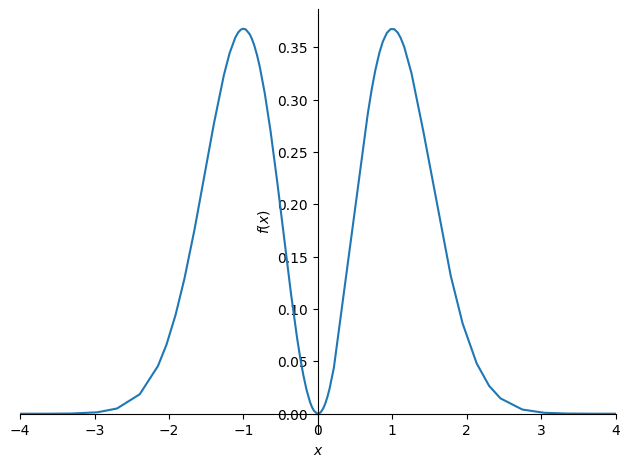

In [47]:
f2 = 'x**2*exp(-x**2)'
x = sp.symbols('x')

def sympy_plot(f, x):
    
    if isinstance(f2, str):
        f = sp.sympify(f)

    p1 = sp.plotting.plot(f, show = True, xlim = (-4, 4))

sympy_plot(f2, x)

Por la forma de la función, al comenzar con el intervalo $[-3, 2]$, el método converge al máximo situado en x = -1. Esto se debe a que la derivada en $x=-3$ es positiva y en $x=2$ es negativa, y para que encuentre un mínimo los signos de las derivadas deben ser al contrario. Si probamos a cambiar un intevalo más cercano al máximo, sí obtenemos el mínimo como solución.

In [48]:
results = bisect_minimum(func, -0.8, 0.9)
results

,Iteration,x
0,0,0.050000
1,1,-0.375000
2,2,-0.162500
3,3,-0.056250
4,4,-0.003125
5,5,0.023437
6,6,0.010156
7,7,0.003516
8,8,0.000195
9,9,-0.001465


Ahora sí ha convergido al mínimo.

A continuación, usamos el método de Newton.

In [49]:
def newton_optimization_1d(f, x0, tol = 1e-4, max_iter = 100):
    
    x = sp.symbols('x')
    f_expr = sp.sympify(f)
    
    # Cálculo de primera y segunda derivada
    
    f_prime = f_expr.diff(x)
    f_double_prime = f_prime.diff(x)
    
    results = []
    x_current = x0
    iteration = 0
    
    results.append([iteration, x_current])
    
    while iteration < max_iter:
        df_prime = f_prime.subs(x, x_current)
        df_double_prime = f_double_prime.subs(x, x_current)
        
        x_new = x_current - df_prime / df_double_prime # iteración
        
        if abs(f_prime.subs(x, x_new)) < tol: # salida por proximidad en iteraciones sucesivas para el punto
            break
        
        x_current = x_new
        iteration += 1
        results.append([iteration, x_current])
        
    table = pd.DataFrame(results)
    table.columns = ['Iteration', 'x']
        
    return table

x = sp.symbols('x')
f = x**2 * sp.exp(-x**2)

    
results = newton_optimization_1d(f, 2.0, tol = 0.0001)
results

,Iteration,x
0,0,2.0
1,1,2.46153846153846
2,2,2.74372720143975
3,3,2.97724171859468
4,4,3.18294308212515
5,5,3.36970020028346
6,6,3.54235824099868
7,7,3.70393697894479


Como podemos observar, al comenzar en x = 2, la función no es capaz de converger a ningún punto de inflexión. Es más, si aumentamos la tolerancia la supuesta posición del mínimo  tiende a números cada vez más grandes.

In [50]:
results = newton_optimization_1d(f, 1.2, tol = 0.0001)
results

,Iteration,x
0,0,1.2
1,1,0.942790335151988
2,2,0.999002511686400


Al comenzar en x = 1.2 el algoritmo se encuentra muy cerca del máximo local en x = 1, por lo tanto converge a este punto. Al contrario que los otros dos puntos de partida, en este caso el algoritmo sí qiue converge.

In [51]:
results = newton_optimization_1d(f, 0.5, tol = 0.0001)
results

,Iteration,x
0,0,0.5
1,1,3.50000000000000
2,2,3.66414799374674


In [52]:
results = newton_optimization_1d(f, 0.3, tol = 0.0001)
results

,Iteration,x
0,0,0.3
1,1,-0.182161780289650
2,2,0.0284321744866923
3,3,-9.22726565714439e-5


Con $x_0=0.3$, que ya está suficientemente por debajo del punto de inflexión, si converge al mínimo.

Al comenzar en x = 0.5 el algoritmo en la primera iteración pasa a la derecha del primer máximo, 
ya que en ese punto tiene primera derivada negativa y segunda positiva. Una vez pasa de x = 1 y se
aleja, observamos el mismo comportamiento que cuando comenzamos en x = 2.

Para conseguir la convergencia al punto deseado podríamos valorar varias alternativas. En primer lugar, como ya hemos comprobado el punto inicial tiene gran relevancia a la hora de localizar los puntos relevantes de la función, una mejor selección ayudaría a la convergencia. Por otro lado, podríamos utilizar un método que, pese a necesitar más iteraciones, asegurase en mayor medida la convergencia.

La condición de convergencia para el método de Newton es que la segunda derivada en el punto inicial sea positiva, esto es, el punto se encuentre en la zona convexa (cóncava si buscamos máximo) en la que está el mínimo, y alejada de un punto de inflexión (derivada nula).

### Ejercicio 3.2

La tabla muestra la población de Estados Unidos (en millones) en diferentes años
 
|Año| Población|
|:----:|:---------:|
 |1815| 8.3|
 |1825| 11.0|
 |1835| 14.7|
 |1845|19.7|
 |1855| 26.7|
 |1865| 35.2|
 |1875|44.4|
 |1885| 55.9|

 Tenemos, por tanto, un conjunto de datos $(t_j, y_j)$ donde $t_j$ es el año e $y_j$ la población. Por simplicidad,
 el año 1815 se etiqueta como t1 = 1, el año 1825 como t2 = 2, y así sucesivamente. Ajustar el modelo
 $φ(x,t) = x_1e^{x_2t}$ comenzando en x1 = 6 y x2 = 0.3, utilizando el método de Levenberg-Marquardt. El criterio
 de parada es que la variación en la suma de los cuadrados de los residuos sea menor de 0.01.

In [53]:
def levenberg_marquardt(func, indep_vars_symbols, params_symbols, indep_vars_values, y_vec, init_vals, tol = 1e-4, max_iter = 10, lambda_0 = 10):
    
    # Obtenemos la lista de funciones evaluados en todos los puntos
    # de variables independientes
    f = []
    for idx in range(len(indep_vars_values[indep_vars_symbols[0]])):
        subs_values = {key: values[idx] for key, values in indep_vars_values.items()}
        f.append(func.subs(subs_values))
    # Residuos
    r = [f_j - y_j for f_j, y_j in zip(f, y_vec)]
    # Jacobiano
    jacobo = sp.Matrix(f).jacobian(params_symbols)

    # Inicializamos variables para el bucle
    results = []
    params_k = init_vals
    lambda_k = lambda_0
    diff_cond = 2 * tol
    iter_count = 0
    last_iter = False

    while iter_count < max_iter:

        # Valores de la iteración k
        jacobo_k = jacobo.subs(params_k)
        r_k = np.asarray([r_j.subs(params_k) for r_j in r], dtype = np.float16)
        d_k = - np.dot(
            sp.Matrix(
                np.dot(jacobo_k.T, jacobo_k) +
                lambda_k * np.diag(np.dot(jacobo_k.T, jacobo_k).diagonal())).inv(),
            np.dot(jacobo_k.T, r_k))
        
        # Valores de la iteración k + 1
        params_k1 = {key_j: value_j + d_k_j for key_j, value_j, d_k_j in zip(params_k.keys(), params_k.values(), d_k)}
        r_k1 = np.asarray([r_j.subs(params_k1) for r_j in r], dtype = np.float16)

        # Añadimos la iteración a la lista de resultados
        results.append([iter_count] + list(params_k.values()) + [sum(r_k**2), lambda_k] + list(d_k))

        # Condición para el siguiente paso
        lambda_cond = norm(r_k1) ** 2 - norm(r_k)**2
        if lambda_cond > 0:
            lambda_k *= 10
        else:
            lambda_k /= 10
            params_k = params_k1
            diff_cond = lambda_cond
        iter_count += 1

        # Condición de salida
        if last_iter:
            break
        if abs(diff_cond) < tol:
            last_iter = True

    # Generamos tabla con los resultados
    table = pd.DataFrame(results)
    table.columns = ['Iter'] + [str(symbol) for symbol in params_symbols] + ['\u2211 r²', 'lambda'] + ['d_' + str(symbol) for symbol in params_symbols]
    
    return table, params_k

In [54]:
# Datos
# Variables independientes
t = sp.symbols('t')
indep_vars_symbols = [t]
indep_vars_values = {t: [1, 2, 3, 4, 5, 6, 7, 8]}
y_vec = [8.3, 11.0, 14.7, 19.7, 26.7, 35.2, 44.4, 55.9]

# Ecuación de ajuste
# Parámetros
x1, x2 = sp.symbols('x1 x2')
params_symbols = [x1, x2]
func = x1 * np.e ** (x2 * t)

# Valores iniciales para los parámetros
init_vals = {x1: 6, x2: 0.3}

# Llamamos a la función
results_table, x_sol = levenberg_marquardt(func, indep_vars_symbols,
                                           params_symbols, indep_vars_values, y_vec, init_vals, tol = 1e-2)
results_table

,Iter,x1,x2,∑ r²,lambda,d_x1,d_x2
0,0,6,0.3,127.353729,10.00000,-0.0490699799747625,-0.00129811036041125
1,1,5.95093002002524,0.298701889639589,95.987314,1.00000,-0.148366404685371,-0.00487046825653025
2,2,5.80256361533987,0.293831421383058,31.763916,0.10000,0.142523598729838,-0.00799776599059964
3,3,5.94508721406970,0.285833655392459,17.161987,0.01000,0.731449116814471,-0.0179003748536257
4,4,6.67653633088418,0.267933280538833,7.231934,0.00100,0.318102895075404,-0.00589893125351105
5,5,6.99463922595958,0.262034349285322,6.020996,0.00010,0.00543590834218627,4.40386570703154e-5
6,6,7.00007513430177,0.262078387942392,6.011902,0.00001,6.91490663615382e-5,-1.62832948287227e-6
